<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/regressao_linear_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><center></h1>
<center><h1>Análise Numérica<center></h1>
<center><h2>2025/1</h2></center>
<center><h3>Técnicas de Regressão</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT, UDESC</h4></center>

###  Ajuste de retas pelo método de mínimos quadrados

Usaremos a biblioteca opimize do scypy:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

#### Exemplo 1

Suponhamos que um experimento que descreve uma relação $x=x(t)$ produz os resultados mostrados na tabela abaixo:

In [ ]:
T = np.array([1.3,3.3,4.1,6.4,7.3,9.2])
X = np.array([2.5,3.8,4.2,5.2,6.5,7.3])

Façamos um gráfico destes pontos:

Text(0, 0.5, 'X')

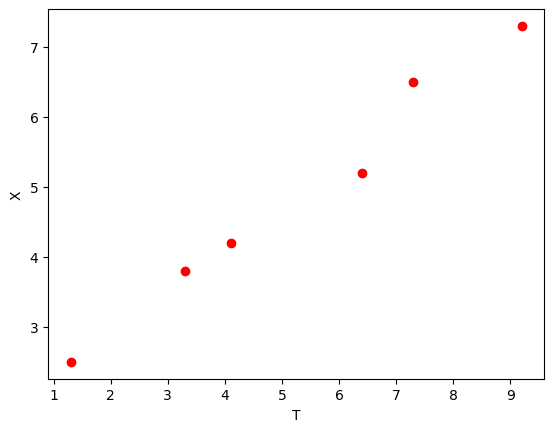

In [ ]:
plt.plot(T,X,'ro')
plt.xlabel('T')
plt.ylabel('X')

Dados podem fornecer uma  informação razoável de que a função $x(t)$ é linear e que o fato dos pontos não estarem exatamente sobre uma linha reta é devido a erros experimentais. Um vez feita tal suposição podemos nos perguntar como podemos determinar os coeficientes $a$ e $b$ reta
$$
                           x = at + b
$$  
que melhor se ajusta a esses dados.


Suponhamos que uma suposição é feita sobre os valores de $a$ e $b$. Em geral,um ponto $(T_k,X_k)$ não estará exatamente sobre a reta, ou seja,

$$
aT_k+b-X_k \neq 0
$$

Podemos definir um erro absoluto associado a este ponto, que depende de $a$ e $b$, dado por

$$
                 E_k(a,b)=|aT_k+b-X_k|
$$

Supondo que, em geral, temos $n$ pontos, o erro total $E(a,b)$ é a soma dos erros associados a todos os $n$ pontos:

$$
               E(a,b)=\sum_{i=1}^{n} |aT_k+b-X_k|
$$

A próxima tarefa consiste em encontrar o ponto $(a,b)$ que minimiza esta função.

Este problema é um exemplo de uma  aproximação $L_1$ e que pode ser resolvido por meio de técnicas de programação linear. Dependendo do número de pontos a complexidade deste problema em termos de número de operações pode ser muito custosa. O métodos do cálculo diferencial não podem ser aplicados, pois esta função não é diferenciável.


Na prática, é mais conveniente minimizar a seguinte função de erro de $a$ e $b$:

$$
\phi(a,b)=\sum_{i=1}^{n} (aT_k+b-X_k)^2,
$$

que pode ser minimizada por meio de técnicas de cálculo. ALém disso, é possível mostrar que se os erros têm uma distribuição normal, então a minimização de $\phi(a,b)$ produz o melhor estimador de $a$ e $b$. Esta é a chamada aproximação $L_2$.

As condições necessárias para que um ponto $(a,b)$ seja um mínimo de $\phi$ são

$$
\frac{\partial \phi}{\partial a}=0\,,\qquad \frac{\partial \phi}{\partial b}=0\,.
$$

Em particular,

$$
\frac{\partial \phi}{\partial a}=\sum_{i=1}^{n} 2T_k(aT_k+b-X_k)=0
$$

e

$$
\frac{\partial \phi}{\partial b}=\sum_{i=1}^{n} 2(aT_k+b-X_k)=0\,.
$$

Estas equações, chamadas *normais* podem ser também escritas como



$$
\left(\sum_{k=1}^n T_k^2\right)a+\left(\sum_{k=1}^n T_k\right)b= \sum_{k=1}^n T_k X_k,
$$

$$
\left(\sum_{k=1}^n T_k\right)a+nb=\sum_{k=1}^n X_k.
$$

Definindo

$$
p = \sum_{k=1}^n T_k\,,\quad q=\sum_{k=1}^n X_k\,,\quad
r=\sum_{k=1}^n T_k X_k\,,\quad s=\sum_{k=1}^n T_k^2\,,
$$

temos, de forma matricial,

$$
\begin{bmatrix}
s&p\\p&n
\end{bmatrix}=
\begin{bmatrix}
a\\b
\end{bmatrix}=\begin{bmatrix}
r\\q
\end{bmatrix}\,.
$$

Definindo

$$
\Delta = det \begin{bmatrix}
s&p\\p&n
\end{bmatrix} = ns-p^2\,,
$$

temos, usando a regra de Cramer,

$$
a = \frac{1}{\Delta}det\begin{bmatrix}
r&p\\q&n
\end{bmatrix}=\frac{1}{d}(rn-pq)\,,
$$

$$
b = \frac{1}{\Delta}det\begin{bmatrix}
s&r\\p&q
\end{bmatrix}=\frac{1}{d}(sq-pr)\,.
$$

Voltemos ao nosso problema. Temos aqui

In [ ]:
p = np.sum(T)
q = np.sum(X)
r = np.sum(T*X)
s = np.sum(T**2)
n = np.size(T)

In [ ]:
d = n*s-p**2

O coeficiente angular da reta é dado por

In [ ]:
a = 1/d*(r*n-p*q)
a

np.float64(0.6100669002867147)

O coeficiente linear é:

In [ ]:
b = 1/d*(s*q-p*r)
b

np.float64(1.7036476584899696)

Façamos o gráfico da reta:

In [ ]:
t = np.linspace(0, 10,100)
t

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

Text(0, 0.5, 'x')

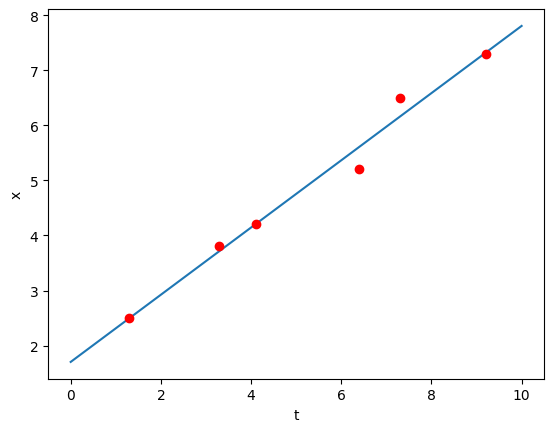

In [ ]:
plt.plot(t,a*t+b)
plt.plot(T,X,'ro')
plt.xlabel('t')
plt.ylabel('x')

Visualmente o ajuste parece bem feito. Podemos agora determinar $x(t)$ para valores não tabelados. Por exemplo determinemos $x(4.5)$. A função que define a reta é dada por

In [ ]:
def f(t, a, b):
    return a*t + b

Portanto,

In [ ]:
round(f(4.5,a,b),2)

np.float64(4.45)

Podemos resolver este problema diretamente, usando o comando curve_fit do scipy:

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def g(t, a, b):
    return a*t+b

O comando que realiza o ajuste pelo método de mínimos quadrados é o seguinte:

In [ ]:
param, pcov = curve_fit(g, T, X)

O primeiro argumento é o array com os valores dos parâmetros (o segundo é a matriz de covariância, que não nos interessa neste momento):

In [ ]:
param

array([0.6100669 , 1.70364766])

que são os mesmos valores encontrados anteriormente. Façamos o gráfico correspondente:

Text(0, 0.5, 'x')

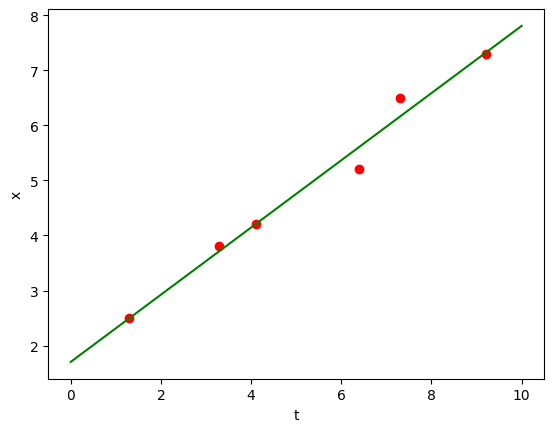

In [ ]:
plt.plot(T,X,'ro', t, g(t, *param), 'g-')
plt.xlabel('t')
plt.ylabel('x')

Podemos quantificar o erro no ajuste calculando o erro quadrático médio. Definimos o array que calcula o valor da função $g(t)$, agora com os parâmetros determinados, em cada componente do array $T$:

In [ ]:
F = g(T,*param)
F

array([2.49673463, 3.71686843, 4.20492195, 5.60807582, 6.15713603,
       7.31626314])

Podemos agora calcular o erro quadrático médio:

In [ ]:
n=len(F)
np.sum(F-X)**2/n

np.float64(5.437925012953547e-22)

### Ajuste de funções quaisquer pelo método de mínimos quadrados

#### Exemplo 2.
A técnica acima pode ser generalizada para ajustar qualquer função a um conjunto de dados. Por exemplo, suponhamos que temos os dados:

In [ ]:
x = np.array([1., 1.5,2.,3.,4.,5.])
y = np.array([5.3,6.4,8.2,7.2,6.6,4.3])

Façamos um gráfico destes pontos:

Text(0, 0.5, 'y')

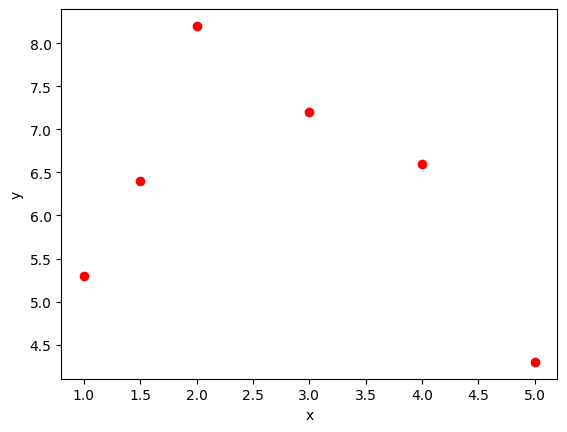

In [ ]:
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')

Se quisermos, por exemplo ajustar a função $f(x) = a+bx+cx^2+d\mbox{e}^{-x}$ a estes dados, devemos minimizar o erro:

$$
\phi(a,b,c,d)=\sum_{k=1..n}(a+bx_k+cx_k^2+d\mbox{e}^{-x_k}-y_k)^2
$$

O ponto de mínimo deve satisfazer:

$$
\frac{\partial \phi}{\partial a}=0\,,\quad \frac{\partial \phi}{\partial b}=0\,,\quad
\frac{\partial \phi}{\partial c}=0\,,\quad
\frac{\partial \phi}{\partial d}=0\,.
$$

Como os parâmetros a serem determinados aparecem linearmente, estas 4 condições geram 4 equações lineares que determinam os valores dos parâmetros que minimizam o erro. Note que se os parâmetros aparecerem de forma não linear na função de ajuste, a correspondente equação para os parâmetros será não-linear e sua solução pode ser difícil de ser encontrada.

Façamos o ajuste diretamente, usando comandos do Python:

In [ ]:
def h(t, a, b,c,d):
    return a + b*t+c*t**2 +d*np.exp(-t)

In [ ]:
param, pcov = curve_fit(h, x, y)

In [ ]:
param

array([  9.94130347,   0.24101929,  -0.26833019, -12.80943743])

Façamos o gráfico correspondente:

In [ ]:
t = np.linspace(0.9, 5.1,30)

Text(0, 0.5, 'y')

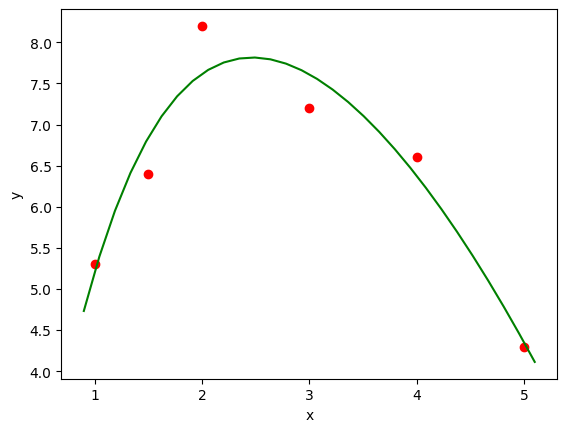

In [ ]:
plt.plot(x,y,'ro', t, h(t, *param), 'g-')
plt.xlabel('x')
plt.ylabel('y')

Podemos quantificar o erro no ajuste calculando o erro quadrático médio. Definimos o array que calcula o valor da função $f$, agora com os parâmetros determinados, em cada componente do array $x$:

In [ ]:
H = h(x,*param)
H

array([5.2016639 , 6.84091767, 7.61645247, 7.61164534, 6.37748464,
       4.35183597])

Lembremos que os valores das ordenadas (valores observados de $y$) são dados por:

In [ ]:
y

array([5.3, 6.4, 8.2, 7.2, 6.6, 4.3])

Podemos agora calcular o erro quadrático médio:

In [ ]:
n=len(y)
np.sum(H-y)**2/n

np.float64(2.612037485647759e-17)

Suponhamos que queremos inferir o valor de $y(4.5)$ e $y(4.7)$:

In [ ]:
np.round(h(np.array([4.5,4.7]),*param),2)

array([5.45, 5.03])

### Coeficiente de determinação e coeficiente de correlação

Na regressão linear, o objetivo é encontrar um modelo que explique a relação entre uma variável dependente $y$ e uma ou mais variáveis ​​independentes $x$. O **método dos mínimos quadrados** é uma abordagem padrão que minimiza a soma dos quadrados dos resíduos:

$$
\text{SSE} = \sum_{i=1}^n(\hat{y}_i-y_i)^2
$$

sendo $\hat{y}_i$  os valores previstos pelo modelo  e $y_i$  os valores observados (tabelados).

O **coeficiente de determinação**, denotado por $r^2$, é uma medida de quão bem o modelo de regressão explica a variabilidade dos dados de resposta em torno de sua média. É definido como:

$$
r^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

Significado das siglas:

- $\text{SSE}$ (*sum of squared estimate of errors*)  é a **soma dos erros quadrados** $\sum (y_i - \hat{y}_i)^2$
- $\text{SST}$ (*sum of squares total*) é a **soma total dos quadrados**: $\sum (\hat{y}_i - \bar{y})^2$


Alternativamente, $r^2$ pode ser expresso como:

$$
r^2 = \frac{\text{SSR}}{\text{SST}}
$$

onde $\text{SSR}$ é a **soma dos quadrados da regressão**, medindo a variância explicada pelo modelo:

$$
\text{SSR} = \sum (\hat{y}_i - \bar{y})^2
$$

Notemos que:

- $r^2 = 1$: o modelo explica toda a variabilidade nos dados de resposta.
- $r^2 = 0$: o modelo não explica nenhuma variabilidade; não é melhor do que prever a média.
- $0 < r^2 < 1$: a proporção da variabilidade explicada pelo modelo.


Na regressão linear simples (um preditor), $r^2$ também é o quadrado do coeficiente de correlação de Pearson entre $x$ e $y$. A quantidade $r$ é denominada *coefficiente de correlação*.

#### Exemplo 3.
Façamos ajuste e determinemos o coeficiente de determinação para os seguintes dados.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Dados
x = np.array([1., 2., 3., 4., 5. ,6. , 7., 8.])
y = np.array([2.3, 6.4, 8.2, 7.2, 6.6, 4.3, 2.3, 1.4])

# Modelo
def h(t, a, b, c, d):
    return a + b*t + c*t**2 + d*np.exp(-t)

# Ajuste da curva
param, pcov = curve_fit(h, x, y)

Façamos o gráfico:

Text(0, 0.5, 'y')

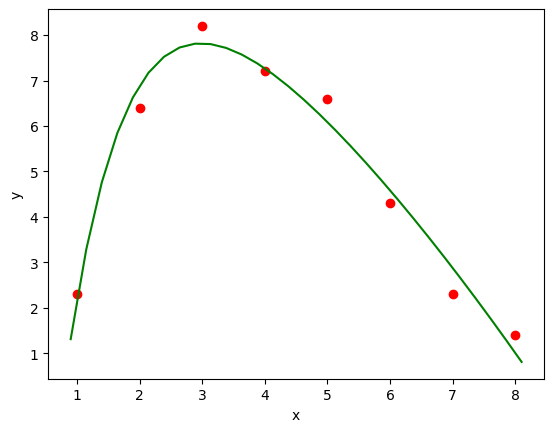

In [ ]:
t = np.linspace(0.9, 8.1,30)
plt.plot(x,y,'ro', t, h(t, *param), 'g-')
plt.xlabel('x')
plt.ylabel('y')

Calculemos o coeficiente de determinação:

In [ ]:
y_pred = h(x, *param)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_pred)**2)

r2 = 1 - ss_res / ss_total

print(f"r²= {r2:.4f}")

r²= 0.9739


Os resultados indicam que 97,39% da incerteza original foi explicada por esse modelo. Esse resultado confirma a conclusão de que a equação proposta representa um bom ajuste, como também é evidente a partir do gráfico.


Façamos a predição em $x=4.5$:

In [ ]:
round(h(4.5,*param),2)

np.float64(6.73)

### Método dos gradientes descendentes

O método descrito anteriormente funciona bem para funções de uma variável e quando o número de pontos não é muito grande. Descreveremos agora um método mais apropriado para lidar com ajuste de funções de uma ou mais variável, que funciona bem com um número muito grande de pontos. Nosso objetivo é modelar a relação entre uma variável dependente escalar $y$ e uma variável independente $x$ como:

$$
y \approx \hat{y} = \theta_0 + \theta_1 x\,.
$$

Devemos encontrar os parâmetros $\theta_0$ e $\theta_1$ que minimizem a discrepância entre os valores previstos $\hat{y}$ e os valores observados $y$. Essa discrepância é quantificada pela função de custo (Erro Quadrático Médio):

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right)^2
$$

O método dos gradientes descendentes é um algoritmo de otimização iterativa para minimizar a função de custo $J(\theta_0, \theta_1)$. Os parâmetros são atualizados da seguinte forma:

$$
\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
$$

para $j = 0, 1$, onde $\alpha$ é a taxa de aprendizado (tomando como positivo, pois buscamos um mínimo).

As derivadas parciais são:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)}
$$

De modo mais compacto, para fins computacionais,  podemos reescrever:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

onde $y^{(i)}$ são os valores observados e $h_{\theta}(x)$ é a hipótese, dada pelo modelo linear.

$$h_{\theta}(x) = \theta^T\mathbf{x} = \theta_0 + \theta_1x_1$$

sendo

$$
\theta^T = [\theta_0 \,\,\theta_1]\,,\qquad \mathbf{x}^T = [ 1,x_1]\,.
$$

#### Exemplo 4
Antes de usar o método em um problema prático, validaremos o método em um exemplo artificial, usando dados sintéticos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Gera dados sintéticos
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [ ]:
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Definimos o vetor de dados $\mathbf{x}^T = [ 1,x_1]$:

In [ ]:
X = np.c_[np.ones((100, 1)), x]
X[0:5]

Note que

In [ ]:
np.shape(X)

Visualisemos alguns valores de X:

In [ ]:
X[0:5]

Definimos agora os parâmetros. O vetor de parâmetros $\theta=[\theta_0,\theta_1]^T$ terá valor inicial nulo:

In [ ]:
# Parâmetros
alpha = 0.1
n_it = 1000
m = len(x)
theta = np.zeros((2,1))

Façamos os cálculos:

In [ ]:
for _ in range(n_it):
    gradJ = 1/m * X.T @ (X @ theta - y)
    theta = theta - alpha * gradJ

print(f"Theta encontrado: {theta.ravel()}")

In [ ]:
J = (1/(2*m)) * np.sum((X @ theta - y)**2)
J

Podemos agora mostrar os gráficos:

In [ ]:
# Regression line
plt.figure(figsize=(6, 4),dpi=100)
plt.scatter(x, y, label="Dados")
plt.plot(x, X @ theta, color='red', label="Regressão")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title("Regressão linear com gradientes descendentes")
plt.grid(True)
plt.show()

Para encontrar um determinado valor sobre a reta, por exemplo, $y(1.5)$, podemos calcular:

In [ ]:
x = np.array([1,1.5])

de modo que

In [ ]:
x@theta

ou

In [ ]:
def predict(x,theta):
    xx = np.array([1,x])
    y_pred = xx @ theta
    return round(y_pred.item(),4)

In [ ]:
predict(1.5,theta)

#### Exemplo 5.
Utilizemos agora uma função que determina a reta de regressão:

In [ ]:
def grad(x,y):
    alpha = 0.01
    n_it = 1000
    m = len(x)
    theta = np.zeros((2,1))
    X = np.c_[np.ones((m, 1)), x]
    for _ in range(n_it):
        gradJ = 1/m * X.T @ (X @ theta - y)
        theta = theta - alpha * gradJ
    return theta

In [ ]:
# Gera dados sintéticos
np.random.seed(0)
x = 3 * np.random.rand(10, 1)
y = 2 + 3.5 * x + np.random.randn(10, 1)

In [ ]:
np.shape(x)

In [ ]:
np.shape(y)

In [ ]:
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Os coeficientes da reta de regressão são:

In [ ]:
theta = grad(x,y)
theta

In [ ]:
# Regression line
m = len(x)
X = np.c_[np.ones((m, 1)), x]
plt.figure(figsize=(6, 4),dpi=140)
plt.scatter(x, y, label="Dados")
plt.plot(x, X @ theta, color='red', label="Regressão")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title("Regressão linear com gradientes descendentes")
plt.grid(True)
plt.show()

#### Exemplo 6.
Vejamos um exemplo [1] que envolve a relação dos lucros de uma companhia que faz compartilhamento de bicicletas e a população da cidade na qual esta companhia oferece o serviço. Importaremos os dados do arquivo bike_sharing_data.txt. Usaremos a biblioteca pandas para melhor visualização dos dados:

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('bike_sharing_data.txt')

Podemos visulizar as primeiras linhas do arquivo:

In [ ]:
data.head()

Os dados das duas colunas estão em unidades de 10000. Outras informações podem ser obtidas por meio do atributo:

In [ ]:
data.info()

Ou seja, temos dados de 97 cidades. Façamos um gráfico:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ax = sns.scatterplot(x= "Population", y="Profit", data=data)
ax.set_title("Lucro em US$10000 vs  População em 10000");

Usando ggplot, temos um estilo mais elegante de gráfico:

In [ ]:
plt.style.use('ggplot')
ax = sns.scatterplot(x= "Population", y="Profit", data=data)
ax.set_title("Lucro em US$10000 vs  População em 10000");

Este gráfico indica que um ajuste linear é, aparentemente,  apropriado.

In [ ]:
m = data.Population.values.size
m

In [ ]:
x = data.Population.values
x

In [ ]:
y = data.Profit.values
y

Note que

In [ ]:
np.shape(y)

ou seja, x e y são objetos do tipo 1-array. Eles devem ser transformados em vetores 2D da forma (m, 1). Tal conversão e feita dentro da função abaixo:

In [ ]:
def grad2(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    alpha = 0.01
    n_it = 1000
    m = len(x)
    theta = np.zeros((2,1))
    X = np.c_[np.ones((m, 1)), x]
    for _ in range(n_it):
        gradJ = 1/m * X.T @ (X @ theta - y)
        theta = theta - alpha * gradJ
    return theta

In [ ]:
theta = grad2(x,y)
theta

Para fazer o gráfico da reta resultante, transformemos $\theta$ em um array 1D:

In [ ]:
np.shape(theta)

In [ ]:
theta = np.squeeze(theta)
theta

In [ ]:
np.shape(theta)

Façamos o gráfico:

In [ ]:
sns.scatterplot(x="Population", y="Profit", data=data)
x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
plt.plot(x_value,y_value,'b-')
plt.xlabel("Population in 10000")
plt.ylabel("Profit in $10,000.00")
plt.title("Linear Regression")

Usaremos a função:

In [ ]:
def predict(x,theta):
    xx = np.array([1,x])
    y_pred = xx @ theta
    return round(y_pred.item(),4)

Com $\theta$ já calculado podemos definir a função que faz as predições para o lucro

$$
h_{\theta}(x) = \theta^T x
$$

Por exemplo,

In [ ]:
y_pred1 = predict(20,theta)*10000

print("Predição de lucro para uma população de 200 mil habitantes: US$" +str(round(y_pred1,2)))

In [ ]:
y_pred2 = predict(8.4,theta)*10000
print("Predição de lucro para uma população de 84000 habitantes: US$" +str(round(y_pred2,2)))

#### Exemplo 7
Usaremos o módulo sklearn. Uma empresa de energia deseja prever a demanda de eletricidade (em megawatts, MW) com base na temperatura externa (em °C). Ela coletou dados de uma rede elétrica durante vários dias.

Espera-se que a relação seja não linear em geral (por exemplo, temperaturas muito altas ou muito baixas aumentam a demanda devido ao aquecimento/resfriamento), mas para uma faixa moderada, uma aproximação linear é razoável.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dados temperatura (°C) vs demanda de energia elétrica (MW)
temperature = np.array([10, 12, 15, 17, 20, 22, 24, 25, 26, 27, 29, 30]).reshape(-1, 1)
demand = np.array([520, 510, 490, 480, 460, 455, 450, 448, 447, 446, 445, 444])  # MW

Façamos o gráfico dos dados:

In [ ]:
plt.plot(temperature,demand,'ro')
plt.xlabel('Temperatura (C)')
plt.ylabel('Demanda (MW)')
plt.grid(True)
plt.show()

Usaremos o comando do módulo para fazer o ajuste:

In [ ]:
# Fit linear regression model
model = LinearRegression()
model.fit(temperature, demand)
pred = model.predict(temperature)
r2 = r2_score(demand, pred)

In [ ]:
# Output coefficients
print(f'Intercept (base demand): {model.intercept_:.2f} MW')
print(f'Slope (change per °C): {model.coef_[0]:.2f} MW/°C')
print(f'r²: {r2:.4f}')

Os resultados indicam que 92,25% da incerteza original foi explicada por esse modelo. Esse resultado confirma a conclusão de que a equação quadrática representa um bom ajuste, como também é evidente a partir do gráfico.

In [ ]:
plt.scatter(temperature, demand, label='Demanda medida')
plt.plot(temperature, pred, color='red', label='Ajuste linear')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demanda (MW)')
plt.title(f'Demanda vs Temperatura\nAjuste Linear (R² = {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()

Façamos um predição de demanda quando a temperatura é de 16°C.

In [ ]:
# T_new = pd.DataFrame({'Temperature': [16]})
demand_pred = model.predict([[16]])
print(f'Demanda prevista a 16°C: {demand_pred[0]:.2f} MW')

Façamos um ajuste quadrático usando mínimos quadrados.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Dados
x = np.array([10, 12, 15, 17, 20, 22, 24, 25, 26, 27, 29, 30])
y = np.array([520, 510, 490, 480, 460, 455, 450, 448, 447, 446, 445, 444])  # MW

# Modelo
def h(t, a, b, c):
    return a + b*t + c*t**2

# Ajuste da curva
param, pcov = curve_fit(h, x, y)

In [ ]:
t = np.linspace(10, 31,50)
plt.plot(x,y,'ro', t, h(t, *param), 'g-')
plt.xlabel('Temperatura (°C) ')
plt.ylabel('Demanda (MW)')

O coeficiente de determinação é dado por:

In [ ]:
y_pred = h(x, *param)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_pred)**2)

r2 = 1 - ss_res / ss_total

print(f"r²= {r2:.4f}")

Os resultados indicam que 99,49% da incerteza original foi explicada por esse modelo. Esse resultado confirma a conclusão de que a equação quadrática representa um ajuste melhor do que o linear, como também é evidente a partir do gráfico.

Os coeficientes do polinômio são:

In [ ]:
param

Podemos imprimir o polinômio resultante:

In [ ]:
a, b, c = param

print(f"Função ajustada:")
print(f"h(t) = {a:.4f} + {b:.4f}t + {c:.4f}t²")

#### Exemplo 8
Tomemos agora um conjunto de dados com diversas variáveis. O California Housing Dataset é um conjunto de dados amplamente utilizado em projetos de aprendizado de máquina, especialmente para tarefas de regressão. Ele foi derivado do Censo dos Estados Unidos de 1990 e contém informações sobre características demográficas e habitacionais de diferentes regiões da Califórnia. Temos:

- Número de amostras: 20.640

- Número de atributos: 8 variáveis preditoras numéricas e 1 variável alvo

- Variável alvo: MedHouseVal – Valor mediano das casas em unidades de US$100.000

Descrição das Variáveis:

- MedInc: Renda mediana dos habitantes no grupo de blocos (em dezenas de milhares de dólares).

- HouseAge: Idade mediana das casas no grupo de blocos.

- AveRooms: Média do número de cômodos por residência.

- AveBedrms: Média do número de quartos por residência.

- Population: População total do grupo de blocos.

- AveOccup: Média de ocupantes por residência.

- Latitude: Latitude geográfica do grupo de blocos.

- Longitude: Longitude geográfica do grupo de blocos.

- MedHouseVal: Valor mediano das casas no grupo de blocos (em centenas de milhares de dólares).

Nosso objetivo aqui é utilizar regressão linear  para prever o valor médio das casas (MedHouseVal) com base na **mediana de renda** (MedInc). Como o número de dados é muito grande (2640 para cada variável), usaremos gradientes descendentes.

Usaremos a função que introduzimos previamente:

In [ ]:
def grad2(x, y):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    alpha = 0.04
    n_it = 10000
    m = len(x)
    theta = np.zeros((2,1))
    X = np.c_[np.ones((m, 1)), x]
    for _ in range(n_it):
        gradJ = 1/m * X.T @ (X @ theta - y)
        theta = theta - alpha * gradJ
    return theta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Carregar o California Housing Dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

Podemos fazer obter um sumário de todo o dataset:

In [ ]:
# Summary statistics
summary = df.describe()
print(summary)

In [ ]:
df.head()

Definimos os valores de interesse:

In [ ]:
X = df[['MedInc']].values
y = df['MedHouseVal'].values

Note que, de acordo com a definição acima,

In [ ]:
np.shape(X)

In [ ]:
np.shape(y)

Examinemos os dados graficamente:

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Mediana de Renda (MedInc)')
plt.ylabel('Valor Médio das Casas (MedHouseVal)')
plt.title('Relação entre MedInc e MedHouseVal')
plt.show()

Inicialmente usemos nossa função:

In [ ]:
theta = grad2(X,y)
theta

In [ ]:
theta = np.squeeze(theta)

Façamos o gráfico da reta de regressão:

In [ ]:
x_value = [x for x in range(0,15)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
plt.plot(x_value,y_value,'b-')
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Mediana de Renda (MedInc)')
plt.ylabel('Valor Médio das Casas (MedHouseVal)')
plt.title('Relação entre MedInc e MedHouseVal')
plt.title("Linear Regression")

Usemos agora os comandos do módulo sklearn:

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
plt.scatter(X, y, alpha=0.5, label='Dados reais')
plt.plot(X, y_pred, color='black', label='Linha de regressão')
plt.xlabel('Mediana de Renda (MedInc)')
plt.ylabel('Valor Médio das Casas (MedHouseVal)')
plt.title('Regressão Linear: MedInc vs MedHouseVal')
plt.legend()
plt.show()

Podemos ver que os coeficientes da reta de regressão são similares àqueles que obtivemos anteriormente:

In [ ]:
# Coeficiente angular (inclinação)
b = model.coef_[0]
print(b)
# Coeficiente linear (intercept)
a = model.intercept_
print(a)

In [ ]:
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinação (r²): {r2:.4f}")

Podemos concluir que temos:

- Moderado poder explicativo: O modelo consegue explicar cerca de metade da variabilidade observada nos dados, o que pode ser considerado um ajuste moderado.

- Variabilidade não explicada: Cerca de 47.34% da variabilidade permanece não explicada pelo modelo, sugerindo que outros fatores influenciam significativamente a variável dependente.

#### Exemplo 9
Mostraremos agora como usar o módulo sklearn (scikit-learn), num exemplo que envolve a previsão do número de seguidores com base em horas na rede social. Inicialmente importamos as bibliotecas:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Suponha que temos os seguintes dados de usuários:

In [ ]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)

# Número de seguidores (variável dependente)
y = np.array([100, 130, 200, 250, 310, 350, 430, 430, 509, 520])

Notemos acima que ao usar essa  biblioteca, a variável independente sempre deverá convertida para uma matriz coluna (que denotaremos por um letra maiúscula), enquanto que a variável dependente permanece um 1-array (letra minúscula):

In [ ]:
np.shape(X)

In [ ]:
np.shape(y)

O jargão comum na regressão linear deriva de sua já clássica aplicação, que é aprendizado de máquina. Falamos em criar e treinar o modelo:

In [ ]:
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados
modelo.fit(X, y)

Podemos agora obter os coeficientes da reta de regressão

In [ ]:
# Coeficiente angular (inclinação da reta)
coef_angular = modelo.coef_[0]

# Coeficiente linear (intercepto)
coef_linear = modelo.intercept_

# Coeficiente de determinação
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

print(f'Coeficiente angular (inclinação): {coef_angular:.2f}')
print(f'Coeficiente linear (intercepto): {coef_linear:.2f}')
print(f"Coeficiente de determinação (r²): {r2:.4f}")

Os resultados indicam que 98,67% da incerteza original foi explicada por esse modelo. Esse resultado confirma a conclusão de que a equação quadrática representa um bom ajuste, como também é evidente a partir do gráfico. Visualizemos os resultados:

In [ ]:
# Plotar os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Reta de regressão')
plt.xlabel('Horas na Rede Social')
plt.ylabel('Número de Seguidores')
plt.title('Regressão Linear: Horas vs Seguidores')
plt.legend()
plt.grid(True)
plt.show()

Façamos previsões para alguns casos:

In [ ]:
# Prever o número de seguidores para 11 horas
horas = np.array([[11], [15]])
seguidores_previstos = modelo.predict(horas)

print(f'Número previsto de seguidores para 11 horas: {seguidores_previstos[0]:.0f}')
print(f'Número previsto de seguidores para 15 horas: {seguidores_previstos[1]:.0f}')

In [ ]:
np.shape(horas)

#### Exemplo 10
O arquivo Advertising.csv contém um conjunto de dados clássico usado para ilustrar modelos de regressão linear em problemas de previsão de vendas com base em investimentos publicitários. Ele aparece, em [2]. O Advertising Dataset contém informações sobre os investimentos em publicidade em três canais de mídia — TV, Rádio e Jornal — e as respectivas vendas de um produto em diferentes mercados. Cada linha representa dados de um mercado específico.

- TV: Investimento em publicidade na TV (em milhares de dólares).

- Radio: Investimento em publicidade no rádio (em milhares de dólares).

- Newspaper: Investimento em publicidade em jornais (em milhares de dólares).

- Sales: Vendas do produto (em milhares de unidades).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

Examinemos os dados desse dataset:

In [ ]:
df.head()

Aqui está o sumário estatístico desse dataset:

In [ ]:
df.describe()

In [ ]:
# Selecionar as variáveis
X = df[['TV']]  # Variável independente
y = df['sales']  # Variável dependente


In [ ]:
# Criar e ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)
# Fazer previsões
y_pred = modelo.predict(X)

# Coeficientes do modelo
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_

In [ ]:
# Exibir os resultados
print(f'Coeficiente angular (inclinação): {coef_angular:.4f}')
print(f'Coeficiente linear (intercepto): {coef_linear:.4f}')
print(f'Coeficiente de determinação (r²): {r2:.4f}')

In [ ]:
# Visualizar os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Linha de regressão')
plt.xlabel('Investimento em TV (milhares de dólares)')
plt.ylabel('Vendas (milhares de unidades)')
plt.title('Regressão Linear: Investimento em TV vs Vendas')
plt.legend()
plt.show()

In [ ]:
# Prever o valor de vendas para um investimento de 180 mil em TV
x_novo = pd.DataFrame({'TV': [180,120]})
y_novo = modelo.predict(x_novo)

print(f'Previsão de vendas para investimento de 180 mil: {y_novo[0]:.2f} mil unidades')
print(f'Previsão de vendas para investimento de 120 mil: {y_novo[1]:.2f} mil unidades')

In [ ]:
x_novo

### Regressão linear múltipla

#### Exemplo 11
Vamos realizar uma regressão linear múltipla utilizando o Advertising Dataset para prever as vendas com base nos investimentos em publicidade em TV, Rádio e Jornal. Primeiro, carregamos o dataset e verificamos suas primeiras entradas para entender sua estrutura.

In [14]:
import pandas as pd

# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas do dataset
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Note que a coluna 'Unnamed: 0' é apenas um índice e pode ser descartada. Selecionamos as variáveis independentes (investimentos em publicidade) e a variável dependente (vendas).

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Definir variáveis independentes e dependente
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

Criamos e ajustamos o modelo aos dados.

In [16]:
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Ajustar o modelo aos dados
modelo.fit(X, y)

LinearRegression()

Após o treinamento, avaliamos o desempenho do modelo utilizando o coeficiente de determinação

In [17]:
# Fazer previsões
y_pred = modelo.predict(X)

# Coeficientes do modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Coeficiente de determinação R²
r2 = r2_score(y, y_pred)

# Exibir os resultados
print(f'Intercepto: {intercepto:.4f}')
print(f'Coeficientes: {coeficientes}')
print(f'Coeficiente de determinação (R²): {r2:.4f}')

Intercepto: 2.9389
Coeficientes: [ 0.04576465  0.18853002 -0.00103749]
Coeficiente de determinação (R²): 0.8972


Portanto, aproximadamente 89.72% da variabilidade nas vendas é explicada pelos investimentos em publicidade nos três canais.

Suponhamos que queremos prever as vendas para os seguintes investimentos:

- TV: 150 mil dólares
- Rádio: 22 mil dólares
- Jornal: 12 mil dólares

In [18]:
# Novo conjunto de dados para previsão (como DataFrame com nomes de colunas)
novo_investimento = pd.DataFrame([[150, 22, 12]], columns=['TV', 'radio', 'newspaper'])

# Previsão de vendas
venda_prevista = modelo.predict(novo_investimento)

print(f"Vendas previstas: {venda_prevista[0]:.2f} mil unidades")

Vendas previstas: 13.94 mil unidades


Podemos testar múltiplos conjuntos de dados de investimento:

In [19]:
# Múltiplos conjuntos de dados para previsão (com nomes de colunas)
novos_investimentos = pd.DataFrame([
    [150, 22, 12],
    [200, 30, 20],
    [100, 15, 10]
], columns=['TV', 'radio', 'newspaper'])

# Previsões de vendas
vendas_previstas = modelo.predict(novos_investimentos)

for i, pred in enumerate(vendas_previstas):
    print(f"Conjunto {i+1}: Vendas previstas = {pred:.2f} mil unidades")


Conjunto 1: Vendas previstas = 13.94 mil unidades
Conjunto 2: Vendas previstas = 17.73 mil unidades
Conjunto 3: Vendas previstas = 10.33 mil unidades


Podemos visualizar a relação entre as variáveis independentes e a variável dependente utilizando gráficos de dispersão:

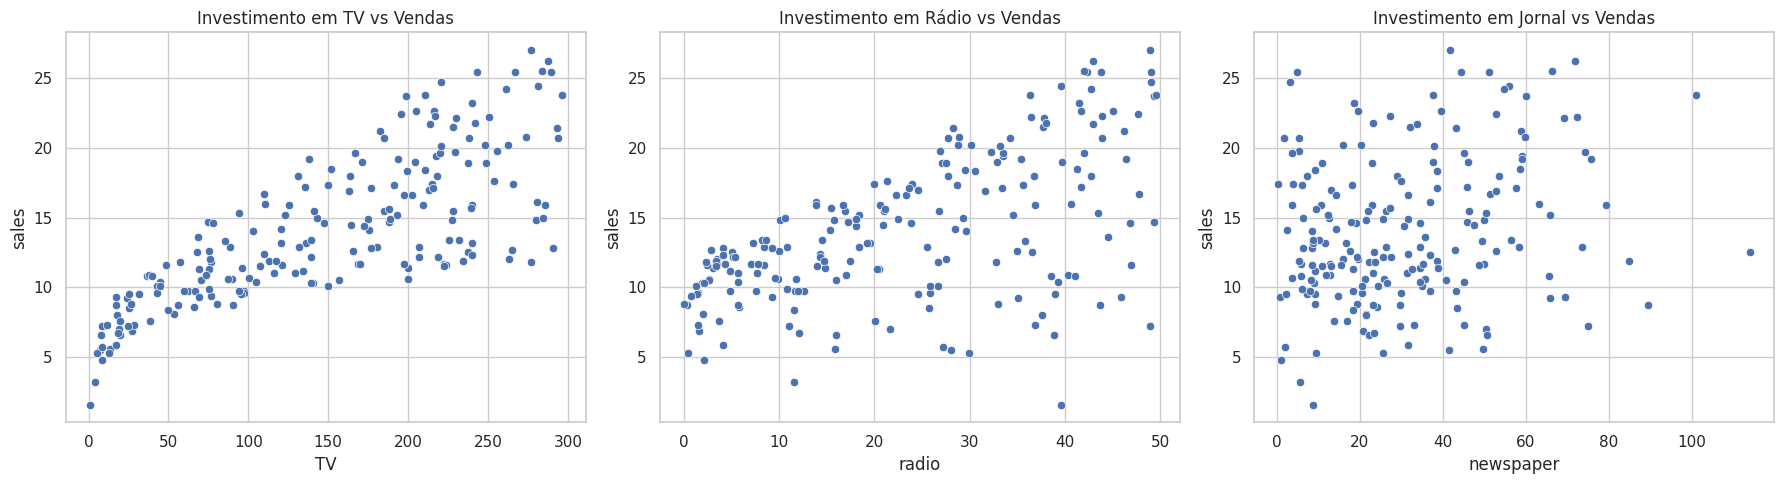

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar gráficos de dispersão para cada variável independente
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='TV', y='sales', data=df, ax=axs[0])
axs[0].set_title('Investimento em TV vs Vendas')

sns.scatterplot(x='radio', y='sales', data=df, ax=axs[1])
axs[1].set_title('Investimento em Rádio vs Vendas')

sns.scatterplot(x='newspaper', y='sales', data=df, ax=axs[2])
axs[2].set_title('Investimento em Jornal vs Vendas')

plt.tight_layout()
plt.show()

Vemos que investimentos em TV e Rádio têm impactos significativos nas vendas, enquanto o investimento em Jornal não apresenta uma contribuição relevante.

#### Exemplo 12

O conjunto de dados Auto MPG é um recurso clássico amplamente utilizado em projetos de aprendizado de máquina, especialmente para tarefas de regressão. Ele está disponível no UCI Machine Learning Repository e contém especificações técnicas de automóveis fabricados entre 1970 e 1982.

*Descrição do Conjunto de Dados*

Objetivo: Prever o consumo de combustível de um carro, medido em milhas por galão (MPG), com base em suas características técnicas.

**Tamanho:**  398 registros.

**Atributos:**

- mpg: Consumo de combustível (milhas por galão) — variável alvo contínua.

- cylinders: Número de cilindros do motor — variável discreta.

- displacement: Deslocamento do motor (polegadas cúbicas) — contínua.

- horsepower: Potência do motor — contínua (contém valores ausentes representados por '?').

- weight: Peso do veículo (libras) — contínua.

- acceleration: Tempo para acelerar de 0 a 60 mph (segundos) — contínua.

- model_year: Ano do modelo do carro (70 para 1970, etc.) — discreta.

- origin: Origem do carro (1: EUA, 2: Europa, 3: Japão) — categórica.

- car_name: Nome do modelo do carro — cadeia de caracteres única para cada instância.

Faremos um regressão linear multivariada para descrever o consumo (mpg) em termos das 5 variáveis numéricas cylinders,	displacement,	horsepower,	weight,	acceleration. Para isso usaremos o módulo sklearn.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Os dados podem ser carregados a partir de um domíno público:

In [2]:
# Dataset: Auto MPG dataset
# Link: https://archive.ics.uci.edu/ml/datasets/auto+mpg
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, sep=r'\s+', names=columns, na_values='?')

Façamos um breve exame do dataset:

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Façamos agora o processamento dos dados a serem usados

In [4]:
# Processamento de dados
# Ignora linhas com valores ausentes
df = df.dropna()

# Retira a coluna 'car_name' por não ser numérica
df = df.drop('car_name', axis=1)

# Define as características e o objetivo
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[features].values
y = df['mpg'].values

In [5]:
# Padroniza variáveis (importante para regressão com variáveis em escalas diferentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Inicializa e ajusta o modelo de regressão linear
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [7]:
# Previsões
y_pred = model.predict(X_scaled)

In [8]:
# Coeficiente de determinação
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
r2

0.7076926326770515

In [9]:
# Resultados
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-0.67791319 -0.00868797 -1.73977416 -4.40015767 -0.08019347]
Intercept: 23.445918367346938
Mean Squared Error: 17.76139610540622
R-squared: 0.7076926326770515


Façamos um gráfico que mostra os valores observados e previstos de consumo (MPG):

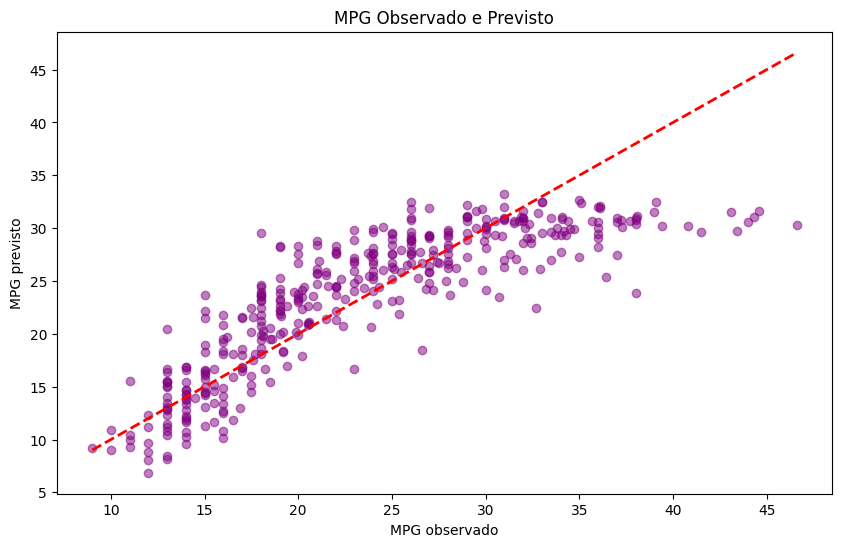

In [10]:
# Visualiza MPG observado e previsto
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='purple', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('MPG observado')
plt.ylabel('MPG previsto')
plt.title('MPG Observado e Previsto')
plt.savefig('auto_mpg_plot.png')

Notemos que:

- Pontos próximos à linha vermelha indicam previsões precisas do modelo.
- Pontos distantes da linha sugerem erros maiores na previsão.
- A dispersão dos pontos ao redor da linha pode indicar a variabilidade dos erros e possíveis padrões não capturados pelo modelo.

Podemos examinar a equação do hiperplano ajustado:

In [11]:
# Equação do hiperplano
print("\nEquação do hiperplano:")
equation = f"MPG = {model.intercept_:.4f}"
for i, (coef, feature) in enumerate(zip(model.coef_, features)):
    equation += f" + ({coef:.4f})(standardized {feature})"
print(equation)


Equação do hiperplano:
MPG = 23.4459 + (-0.6779)(standardized cylinders) + (-0.0087)(standardized displacement) + (-1.7398)(standardized horsepower) + (-4.4002)(standardized weight) + (-0.0802)(standardized acceleration)


In [12]:
# Aplicações
# Formato: [cylinders, displacement, horsepower, weight, acceleration]
example_cars = [
    [4, 120.0, 80.0, 2000.0, 18.0],  # Small efficient car
    [6, 200.0, 100.0, 3000.0, 15.0],  # Mid-range car
    [8, 350.0, 150.0, 4000.0, 12.0]   # Heavy less-efficient car
]

# Converta para 1-array
example_cars = np.array(example_cars)

# Padronize os valores dos recursos de exemplo usando o mesmo escalador
example_cars_scaled = scaler.transform(example_cars)

# Prever MPG para os conjuntos de exemplo
predictions = model.predict(example_cars_scaled)

# Imprima as previsões
print("\nExemplos de predições:")
for i, (car, pred) in enumerate(zip(example_cars, predictions)):
    print(f"\nCar {i+1}:")
    for feature, value in zip(features, car):
        print(f"  {feature}: {value}")
    print(f"  MPG previsto: {pred:.2f}")


Exemplos de predições:

Car 1:
  cylinders: 4.0
  displacement: 120.0
  horsepower: 80.0
  weight: 2000.0
  acceleration: 18.0
  MPG previsto: 30.14

Car 2:
  cylinders: 6.0
  displacement: 200.0
  horsepower: 100.0
  weight: 3000.0
  acceleration: 15.0
  MPG previsto: 23.34

Car 3:
  cylinders: 8.0
  displacement: 350.0
  horsepower: 150.0
  weight: 4000.0
  acceleration: 12.0
  MPG previsto: 15.17


Façamos um estudo de correlação entre MPG e cada uma das variáveis, calculando o coeficiente de correlação entre cada par:

In [21]:
# Coeficientes de correlação de Pearson
print("\nCoeficientes de correlação de Pearson entre MPG e Features:")
correlations = df[features + ['mpg']].corr()['mpg'].drop('mpg')
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.4f}")


Coeficientes de correlação de Pearson entre MPG e Features:


KeyError: "None of [Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',\n       'mpg'],\n      dtype='object')] are in the [columns]"

Visualisemos graficamente:

#### Teoria da Divisão Treino/Teste em Aprendizado de Máquina

No aprendizado de máquina, a divisão dos dados em conjuntos de **treino** e **teste** é uma prática fundamental para avaliar o desempenho de um modelo preditivo. O objetivo é garantir que o modelo não apenas se ajuste bem aos dados usados para seu treinamento, mas também generalize para dados novos e não vistos. Esta seção explica a teoria por trás dessa divisão, destacando sua importância e considerações práticas.

A divisão treino/teste consiste em separar o conjunto de dados disponível em duas partes:

- **Conjunto de treino**: Usado para ajustar o modelo, ou seja, para estimar os parâmetros do modelo (por exemplo, coeficientes em uma regressão linear).
- **Conjunto de teste**: Usado para avaliar o desempenho do modelo em dados não utilizados durante o treinamento, simulando sua performance em aplicações reais.

Seja $ D = \{(x_i, y_i)\}_{i=1}^N $ o conjunto de dados com $  N $ amostras, onde $ x_i $ são as variáveis preditoras e $ y_i $ é a variável alvo. A divisão treino/teste particiona $ D $ em:

- $ D_{\text{treino}}$, com $ N_{\text{treino}} $ amostras (geralmente 70%–80% de $ N $).
- $ D_{\text{teste}}$, com $ N_{\text{teste}} $ amostras (geralmente 20%–30% de $ N $).

A divisão é feita de forma aleatória, mas pode ser estratificada para manter a proporção de classes (em problemas de classificação) ou valores (em regressão).

O objetivo principal da divisão é avaliar a **generalização** do modelo. Um modelo que apresenta bom desempenho no conjunto de treino, mas desempenho ruim no conjunto de teste, sofre de *overfitting* (sobreajuste), ou seja, ele memorizou os dados de treino em vez de aprender padrões gerais. Por outro lado, um modelo com desempenho ruim em ambos os conjuntos pode estar subajustado (*underfitting*), indicando que é muito simples ou mal configurado.

O desempenho do modelo é medido usando métricas como:

- **Erro Quadrático Médio (MSE)** para regressão:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2,
  $$
  onde $ \hat{y}_i $ é a previsão do modelo.
  
- **Coeficiente de Determinação ($ r^2 $)**: Mede a proporção da variância explicada pelo modelo.

Comparamos essas métricas no conjunto de treino e no conjunto de teste. Idealmente, o MSE no teste deve ser próximo ao do treino, e o$r^2 $ deve ser alto em ambos.

Notas:

- **Tamanho da divisão**: Uma proporção comum é 80% treino e 20% teste, mas isso depende do tamanho do conjunto de dados. Conjuntos pequenos podem exigir validação cruzada em vez de uma única divisão.
- **Aleatoriedade**: A divisão deve ser aleatória para evitar viés, mas fixar uma semente (*random seed*) garante reprodutibilidade.
- **Vazamento de dados**: O conjunto de teste deve ser completamente isolado durante o treinamento. Por exemplo, a padronização de dados deve usar apenas as estatísticas (média e desvio padrão) do conjunto de treino.


#### Exemplo 13
Consideremos um exemplo puramente numérico.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Definir semente aleatória para reprodutibilidade
np.random.seed(42)

In [ ]:
# Gerar dados simulados
n_samples = 100
X1 = np.random.uniform(0, 10, n_samples)  # Variável 1
X2 = np.random.uniform(0, 10, n_samples)  # Variável 2
X3 = np.random.uniform(0, 10, n_samples)  # Variável 3

In [ ]:
X1

In [ ]:
# Relação verdadeira: y = 2 + 3*X1 - 2*X2 + 1.5*X3 + ruído
noise = np.random.normal(0, 1, n_samples)
y = 2 + 3 * X1 - 2 * X2 + 1.5 * X3 + noise

In [ ]:
# Criar matriz de variáveis preditoras
X = np.column_stack((X1, X2, X3))

In [ ]:
np.shape(X1)

In [ ]:
np.shape(X)

In [ ]:
# Dividir dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar e ajustar o modelo de regressão linear nos dados de treino
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Fazer previsões nos dados de treino e teste
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Calcular métricas de desempenho
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Imprimir resultados
print("Equação Verdadeira: y = 2 + 3*X1 - 2*X2 + 1.5*X3 + ruído")
print("\nModelo Aprendido:")
print(f"Intercepto: {model.intercept_:.4f}")
print(f"Coeficientes: X1={model.coef_[0]:.4f}, X2={model.coef_[1]:.4f}, X3={model.coef_[2]:.4f}")
print("\nDesempenho no Conjunto de Treino:")
print(f"Erro Quadrático Médio: {train_mse:.4f}")
print(f"Coeficiente de determinação: {train_r2:.4f}")
print("\nDesempenho no Conjunto de Teste:")
print(f"Erro Quadrático Médio: {test_mse:.4f}")
print(f"Coeficiente de determinação: {test_r2:.4f}")

In [ ]:
# Criar gráficos de dispersão para cada variável preditora versus y
plt.figure(figsize=(15, 5))
features = ['X1', 'X2', 'X3']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, i], y, color='blue', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.title(f'y vs {feature}')
plt.tight_layout()
plt.savefig('variaveis_vs_y.png')

In [ ]:
# Criar gráfico de valores reais versus previstos (treino e teste)
plt.figure(figsize=(10, 5))
# Conjunto de treino
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.5, label='Treino')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('y Real (Treino)')
plt.ylabel('y Previsto (Treino)')
plt.title('Reais vs Previstos (Treino)')
plt.legend()
# Conjunto de teste
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='purple', alpha=0.5, label='Teste')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('y Real (Teste)')
plt.ylabel('y Previsto (Teste)')
plt.title('Reais vs Previstos (Teste)')
plt.legend()
plt.tight_layout()
plt.savefig('reais_vs_previstos.png')

In [ ]:
# Criar gráfico de resíduos (treino e teste)
plt.figure(figsize=(10, 5))
# Resíduos do conjunto de treino
plt.subplot(1, 2, 1)
train_residuals = y_train - y_train_pred
plt.scatter(y_train_pred, train_residuals, color='green', alpha=0.5, label='Treino')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('y Previsto (Treino)')
plt.ylabel('Resíduos (Treino)')
plt.title('Resíduos vs Previstos (Treino)')
plt.legend()
# Resíduos do conjunto de teste
plt.subplot(1, 2, 2)
test_residuals = y_test - y_test_pred
plt.scatter(y_test_pred, test_residuals, color='purple', alpha=0.5, label='Teste')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('y Previsto (Teste)')
plt.ylabel('Resíduos (Teste)')
plt.title('Resíduos vs Previstos (Teste)')
plt.legend()
plt.tight_layout()
plt.savefig('residuos.png')

#### Exemplo 14

O conjunto de dados `Credit.csv`, que pode ser encontrado em [2], contém informações simuladas sobre 400 clientes de cartões de crédito. Nosso objetivo é prever o saldo médio do cartão de crédito (`Balance`) com base em variáveis demográficas e financeiras.

**Variáveis:**

* `Income`: Renda anual em milhares de dólares.
* `Limit`: Limite total de crédito concedido.
* `Rating`: Avaliação de crédito do cliente.
* `Cards`: Número de cartões de crédito possuídos.
* `Age`: Idade do cliente.
* `Education`: Anos de educação formal.
* `Gender`: Gênero do cliente (`Male` ou `Female`).
* `Student`: Indica se o cliente é estudante (`Yes` ou `No`).
* `Married`: Indica se o cliente é casado (`Yes` ou `No`).
* `Ethnicity`: Etnia do cliente (`Caucasian`, `Asian`, `African American`).
* `Balance`: Saldo médio do cartão de crédito em dólares (variável alvo).

In [ ]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carregar o conjunto de dados
url = 'https://www.statlearning.com/s/Credit.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas
df.head()

In [ ]:
# Verificar as colunas presentes no DataFrame
print("\nColunas do DataFrame:")
print(df.columns)

In [ ]:
# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

# Exibir as primeiras linhas após o pré-processamento
df.head()

In [ ]:
# Definir variáveis independentes (X) e dependente (y)
X = df.drop('Balance', axis=1)
y = df['Balance']

Note que

In [ ]:
np.shape(X)

In [ ]:
np.shape(y)

In [ ]:
# Salvar os nomes das colunas para uso posterior
colunas_treinamento = X.columns

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

In [ ]:
# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

In [ ]:
# Calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Façamos agora os cálculos sem teste/treinamento:

In [ ]:
modelo2 = LinearRegression()
modelo2.fit(X, y)

In [ ]:
y_pred2 = modelo2.predict(X)

In [ ]:
mse2 = mean_squared_error(y, y_pred2)
rr2 = r2_score(y, y_pred2)
print(f'Erro Quadrático Médio (MSE): {mse2:.2f}')
print(f'Coeficiente de Determinação (R²): {rr2:.2f}')

In [ ]:
# Exibir os coeficientes do modelo
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': modelo.coef_})
print(coeficientes)

In [ ]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")

In [ ]:
# Plotar a relação entre renda e saldo do cartão de crédito
sns.scatterplot(x='Income', y='Balance', data=df)
plt.title('Relação entre Renda e Saldo do Cartão de Crédito')
plt.xlabel('Renda Anual (milhares de dólares)')
plt.ylabel('Saldo Médio do Cartão de Crédito')
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Gerar a matriz de scatter plots
scatter_matrix(df_numerico, figsize=(12, 12), diagonal='hist', alpha=0.7)

# Exibir os gráficos
plt.suptitle('Scatter Plots das Variáveis Numéricas', fontsize=16)
plt.show()

In [ ]:
from scipy.stats import pearsonr
# Função para calcular o coeficiente de correlação de Pearson
def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# Criar a matriz de gráficos de dispersão com os coeficientes de correlação
sns.set(style='white')
g = sns.PairGrid(df_numerico)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_upper(corrfunc)

plt.suptitle('Matriz de Correlação com Coeficientes de Pearson', y=1.02)
plt.show()

In [ ]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Identificar a variável alvo
target = 'Balance'

# Criar gráficos de dispersão de Balance em relação às outras variáveis numéricas
for column in df_numerico.columns:
    if column != target:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_numerico[column], y=df_numerico[target])
        plt.title(f'{target} vs {column}')
        plt.xlabel(column)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

In [ ]:
# Criar novos exemplos para previsão
novos_clientes = pd.DataFrame({
    'Income': [30, 60, 90],
    'Limit': [3000, 6000, 9000],
    'Rating': [200, 400, 600],
    'Cards': [2, 4, 6],
    'Age': [25, 45, 65],
    'Education': [12, 16, 20],
    'Gender_Male': [1, 0, 1],
    'Student_Yes': [0, 1, 0],
    'Married_Yes': [1, 0, 1],
    'Ethnicity_Asian': [0, 1, 0],
    'Ethnicity_Caucasian': [1, 0, 1]
})

# Reindexar para garantir correspondência de colunas
novos_clientes = novos_clientes.reindex(columns=colunas_treinamento, fill_value=0)

# Prever o saldo do cartão de crédito para os novos clientes
saldos_previstos = modelo.predict(novos_clientes)

# Exibir as previsões
print("\nPrevisões de saldo do cartão de crédito para novos clientes:")
for i, saldo in enumerate(saldos_previstos):
    print(f"Cliente {i+1}: Saldo previsto = ${saldo:.2f}")

In [ ]:
# Gerar o gráfico: Balance Observado vs. Balance Previsto
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Balanço Observado')
plt.ylabel('Balanço Previsto')
plt.title('Balanço Observado vs. Balance Previsto')
plt.grid(True)
plt.tight_layout()
plt.show()

Notemos que para o gráfico acima:

- Pontos próximos à linha vermelha tracejada: Indicam que o modelo previu corretamente o saldo ou balanço (Balance) para essas observações.
- Pontos distantes da linha: Sugerem que o modelo teve dificuldade em prever corretamente o saldo ou balanço para essas observações, podendo indicar outliers ou variáveis importantes não incluídas no modelo.

### <h3>Exercícios</h3>

**1.**  Use regressão não-linear para ajustar uma parábola aos seguintes dados:

$ X = [0.2, 0.5, 0.8, 1.2, 1.7, 2.0, 2.3]$

$ Y = [500, 700, 1000, 1200, 2200, 2650, 3750] $


**2.** Considere a funções $f(t) = a+bt+ct^2+dt^3+f\mbox{e}^{-t}$ e $f(t) = a+bt+ct^2+dt^3+f t^4$ e verifique, usando curve_fit, se cada ajuste é melhor ou pior do que o do exemplo para os dados  

In [ ]:
import numpy as np

In [ ]:
x = np.array([1., 1.5,2.,3.,4.,5.])
y = np.array([5.3,6.4,8.2,7.2,6.6,4.3])

**3.** Sejam os pontos:

In [ ]:
x = np.array([1.1,1.5,2.6, 2.8,3.3,4.3,5.4,6.8,7.3])
y = np.array([4.3,5.3,6.4,7.2,7.1,6.3,5.4, 3.5,3.2])

Determine uma função (escolha a forma), linear em 4 parâmetros, que se ajuste a estes dados, usando o método dos mínimos quadrados. Use curve_fit.

**4.** Use os dados de advertising.csv [2] e use o método de gradientes descendentes para determinar os ajustes lineares univariados de vendas por propaganda em (i) TV, (ii) rádio e (iii) jornal.

**5.** No exemplo envolvendo o dataset Auto MPG, determine  polinômios de regressão para ajustar as curvas mpg vs horsepower e mpg x weight.  Faça algumas predições.

**6.** No exemplo 8 refaça os cálculos usando treino e teste.

### Bibliografia

**1.** Snehan Kekre, Linear Regression with NumPy and Python, Coursera Project Network, https://www.coursera.org/projects/linear-regression-numpy-python

**2.** Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning, 2nd ed., Springer, 2021.  https://www.statlearning.com/resources-second-edition